<a href="https://colab.research.google.com/github/DerizhyLouise/RevoU-Data-Analytics-Capstone-Project/blob/main/DataAnalytics-Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Revou Capstone Project'

/content/drive/MyDrive/Revou Capstone Project


In [ ]:
ordersDf = pd.read_csv('orders.csv')

In [ ]:
ordersDf

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24
...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02
996,997,346,53831,2021-01-18,2021-01-31
997,998,407,53308,2021-05-05,2021-05-21
998,999,428,31643,2021-06-15,2021-07-12


In [ ]:
ordersDf["order_date"] = pd.to_datetime(ordersDf["order_date"])
ordersDf["delivery_date"] = pd.to_datetime(ordersDf["delivery_date"])

# **Descriptive Analytics**

In [ ]:
ordersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


# **Business Question**

In [ ]:
# Calculate delivery time in days
ordersDf['delivery_time'] = (ordersDf['delivery_date'] - ordersDf['order_date']).dt.days
print(ordersDf['delivery_time'])


0      25
1      10
2      26
3      13
4       1
       ..
995    20
996    13
997    16
998    27
999    17
Name: delivery_time, Length: 1000, dtype: int64


In [ ]:
# Filter data for the past 3 months
three_months_ago = pd.to_datetime('2021-11-01') - pd.DateOffset(months=3)
recent_orders = ordersDf[ordersDf['order_date'] >= three_months_ago]
print(recent_orders)


     order_id  customer_id  payment order_date delivery_date  delivery_time
0           1           64    30811 2021-08-30    2021-09-24             25
2           3          774    46763 2021-10-08    2021-11-03             26
5           6          800    16197 2021-09-09    2021-10-05             26
9          10          659    21922 2021-10-15    2021-10-16              1
12         13          204    57810 2021-10-15    2021-10-31             16
..        ...          ...      ...        ...           ...            ...
979       980           84    57728 2021-10-19    2021-11-14             26
980       981          830    37730 2021-10-02    2021-10-12             10
983       984          359    10390 2021-09-23    2021-09-30              7
985       986          116    13431 2021-08-02    2021-08-15             13
989       990           87    40306 2021-08-17    2021-09-06             20

[286 rows x 6 columns]


# **What is the average delivery time for customers to receive their orders or products from past 3 months?**

In [ ]:
# Calculate the average delivery time
average_delivery_time = recent_orders['delivery_time'].mean()
print(f"The average delivery time for the past 3 months is: {average_delivery_time:.2f} days")


The average delivery time for the past 3 months is: 14.65 days


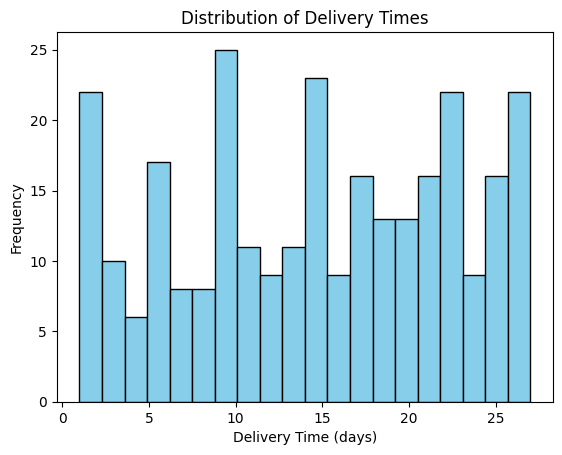

In [ ]:
# Visualize the distribution of delivery times
plt.hist(recent_orders['delivery_time'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Times')
plt.show()
